In [1]:
import numpy as N
import zeldovich as Z
import matplotlib.pyplot as plt
%matplotlib inline

# Read in initial power spectrum that we will use to run the simulation

In [5]:
pkfile='pk_indra7313.txt'
print 'woah'

woah


In [6]:
pkinit=N.loadtxt(pkfile)

# Plot the power spectrum

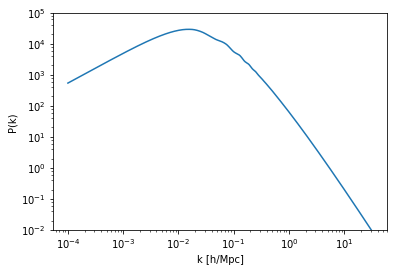

In [7]:
plt.loglog(pkinit[:,0], pkinit[:,1])
plt.ylim([10**-2, 10**5])
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k)')

# Run the Zeldovich simulation with the above power spectrum to z=0

In [9]:
lbox = 500.0
ngrid = 128
nparticles = 128
dens0, x, y, z=Z.run(0.0, pkinit, boxsize=lbox, ngrid=ngrid, exactpk=False)

zeldovich.py:89: RuntimeWarning: invalid value encountered in divide
  xp.real =-kmin*a*(dens.imag)/(kgrid*kgrid)
zeldovich.py:90: RuntimeWarning: invalid value encountered in divide
  xp.imag=kmin*a*(dens.real)/(kgrid*kgrid)
zeldovich.py:92: RuntimeWarning: invalid value encountered in divide
  yp.real =-kmin*b*(dens.imag)/(kgrid*kgrid)
zeldovich.py:93: RuntimeWarning: invalid value encountered in divide
  yp.imag=kmin*b*(dens.real)/(kgrid*kgrid)
zeldovich.py:95: RuntimeWarning: invalid value encountered in divide
  zp.real =-kmin*c*(dens.imag)/(kgrid*kgrid)
zeldovich.py:96: RuntimeWarning: invalid value encountered in divide
  zp.imag=kmin*c*(dens.real)/(kgrid*kgrid)


# Plot the initial Gaussian field that has the above power spectrum

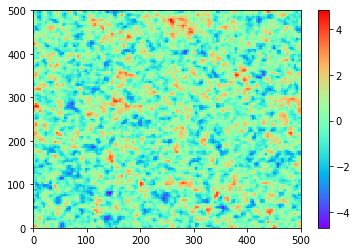

In [10]:
plt.pcolor(N.linspace(0, lbox, ngrid), N.linspace(0, lbox, ngrid), dens0[:,:,0], cmap='rainbow')
plt.colorbar()

# Plot the final particle positions

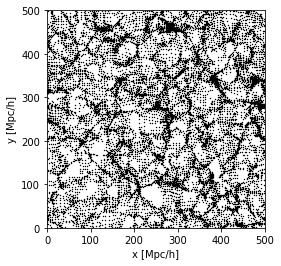

In [11]:
plt.subplot(111, aspect=1)
subset=N.where((x<lbox) & (y<lbox) & (z<lbox/ngrid))
plt.scatter(y[subset], x[subset], lw=0, s=2, c='k')
plt.xlim([0, lbox])
plt.ylim([0, lbox])
plt.xlabel('x [Mpc/h]')
plt.ylabel('y [Mpc/h]')

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

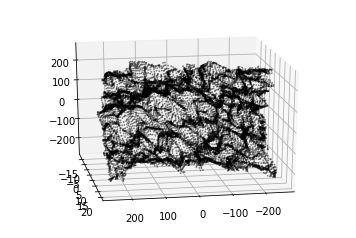

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
def wrap(x, lbox):
    xt = N.copy(x)
    xt[xt>lbox/2] = xt[xt>lbox/2] - lbox
    return xt
ax.scatter(wrap(y[0:ngrid**2], lbox), wrap(x[0:ngrid**2], lbox), wrap(z[0:ngrid**2], lbox), lw=0, s=3, c='k', alpha=0.5)

ax.view_init(20.0, 80.0)



## Compute the density field from the particle positions above

In [15]:
import cic_dens_wrapper
dens_final=cic_dens_wrapper.get_dens(x, y, z, ngrid, lbox)

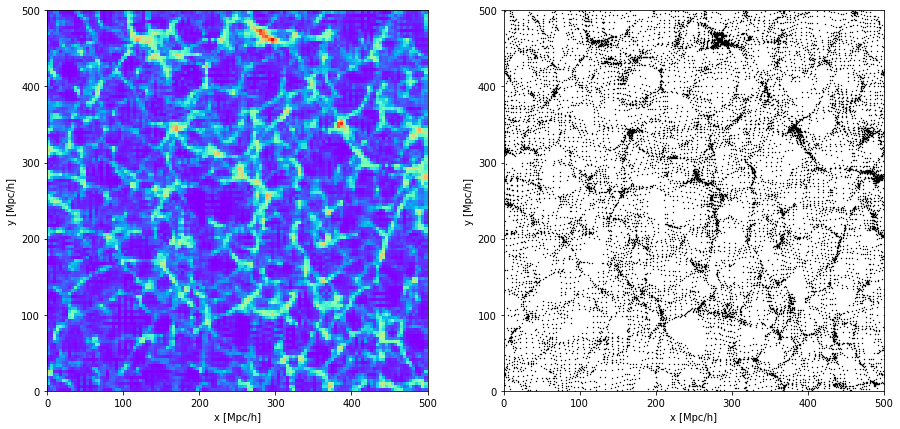

In [16]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1, aspect=1)

plt.pcolormesh(N.linspace(0, lbox, ngrid), N.linspace(0, lbox, ngrid), N.arcsinh(dens_final[:,:,0]), cmap='rainbow')
plt.xlabel('x [Mpc/h]')
plt.ylabel('y [Mpc/h]')


plt.subplot(1, 2, 2, aspect=1)
subset=N.where((x<lbox) & (y<lbox) & (z<lbox/ngrid))
plt.scatter(y[subset], x[subset], lw=0, s=2, c='k')
plt.xlim([0, lbox])
plt.ylim([0, lbox])
plt.xlabel('x [Mpc/h]')
plt.ylabel('y [Mpc/h]')

# Compute the spatial statistics of the final density field

In [17]:
import spatial_stats
r, xi=spatial_stats.getXi(dens_final, nrbins=ngrid/2, boxsize=lbox, get2d=False, deconvolve_cic=False, exp_smooth=0.0)
k, pk=spatial_stats.getPk(dens_final, nkbins=40, boxsize=lbox, deconvolve_cic=True, exp_smooth=2.0)

spatial_stats.py:99: ComplexWarning: Casting complex values to real discards the imaginary part
  dk2=(deltak*N.conjugate(deltak)).astype(N.float)
spatial_stats.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  dk2=(deltak*N.conjugate(deltak)).astype(N.float)
spatial_stats.py:37: RuntimeWarning: invalid value encountered in divide
  wx=N.sin(kmin*a*N.pi/(2*kny))**4/(kmin*a*N.pi/(2*kny))**4
spatial_stats.py:39: RuntimeWarning: invalid value encountered in divide
  wy=N.sin(kmin*b*N.pi/(2*kny))**4/(kmin*b*N.pi/(2*kny))**4
spatial_stats.py:41: RuntimeWarning: invalid value encountered in divide
  wz=N.sin(kmin*c*N.pi/(2*kny))**4/(kmin*c*N.pi/(2*kny))**4


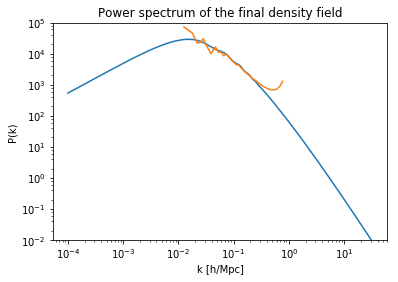

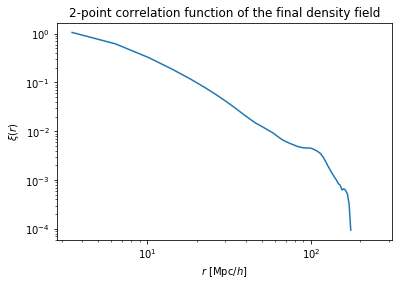

In [18]:

plt.loglog(pkinit[:,0], pkinit[:,1])
plt.loglog(k, pk)
plt.ylim([10**-2, 10**5])
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k)')
plt.title('Power spectrum of the final density field')
plt.figure()
plt.loglog(r, xi)
plt.xlabel('$r$ [Mpc/$h$]')
plt.ylabel(r'$\xi(r)$')
plt.title('2-point correlation function of the final density field')